**Implementação de modelo utilizando algoritmo de Árvore de Decisão**
<br>
<br>
**Autor**: Caio Augusto de Souza Mota (*caiomota802@gmail.com*)

Data: 09/06/2021

**Revisor**: Carlos Eduardo Beluzo (*cbeluzo@gmail.com*)
<br>
<br>
*Codigo adaptado de Diogo Cortiz disponivel em: https://github.com/diogocortiz/Curso-IA-para-todos/tree/master/ArvoreDecis%C3%A3o*

---
Este código é parte do Trabalho de Conclusão de Curso apresentado como exigência parcial para obtenção do diploma do Curso de Tecnologia em Análise e Desenvolvimento de Sistemas do Instituto Federal de Educação, Ciência e Tecnologia de São Paulo Câmpus Campinas.


# 1. Importação de Bibliotecas, carga de dados e funções

In [1]:
# Instalando o Synapse Client
! pip install synapseclient

You should consider upgrading via the 'C:\Users\Caio Mota\Desktop\IA\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [3]:
# Util
import itertools
import synapseclient as syna
from getpass import getpass

# Data
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, cross_val_predict
from sklearn.externals.six import StringIO
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

# Images
import matplotlib.pyplot as plt
import pydotplus
import matplotlib.image as mpimg
from IPython.display import Image

ModuleNotFoundError: No module named 'sklearn.externals.six'

## 1.1 Carregando base de dados disponícel no Synapse

In [4]:
# SPNeodeath
# Recuperando a base de dados do repositório de dados Synapse
syn = syna.Synapse() 
syn.login(input('Sybapse User: '), getpass('Passwd:')) 
 
# Obtendo um ponteiro e baixando os dados
dataset = syn.get(entity='syn22240290') # ID do dataset SPNeodeath

df_ori = pd.read_csv(dataset.path)
df_ori.shape

Sybapse User:  caiomota802@gmail.com
Passwd: ··········


Welcome, Caio Mota!



(1435834, 24)

In [6]:
# Amostra para testes rápidos
df = df_ori.sample(frac=1)

# REMOVENDO OS REGISTROS NOS QUAIS PELO MENOS UM CAMPO ESTÁ EM BRANCO (NAN)
df = df.dropna()

In [7]:
# Exibindo as 5 primeiras linhas
print(df.head(5))

count_row = df.shape[0]  # Número de linhas
count_col = df.shape[1]  # Número de colunas

print(count_row)
print(count_col)

         tp_birth_place  maternal_age  tp_marital_status  \
974927                1            34                2.0   
605024                1            22                1.0   
28856                 1            38                2.0   
899946                1            23                1.0   
1387671               1            30                2.0   

         tp_maternal_education_years  num_live_births  num_fetal_losses  \
974927                           5.0                0                 0   
605024                           4.0                1                 0   
28856                            5.0                0                 0   
899946                           4.0                2                 0   
1387671                          5.0                0                 0   

         tp_pregnancy_duration  tp_pregnancy  tp_labor  \
974927                     5.0           1.0       2.0   
605024                     5.0           1.0       2.0   
28856         

In [8]:
# Disbribuição entre registros de vivos (negativo = 0) e mortos (positivo = 1)
print ('Total de registros negativos: ', df[df['neonatal_death'] == 0 ].shape[0])
print ('Total de registros positivos: ', df[df['neonatal_death'] == 1 ].shape[0])

Total de registros negativos:  1269322
Total de registros positivos:  7826


# 2. Aplicação de modelos de Machine Learning: Decision Tree

---



Precisamos converter o Dataframe para um Array Numpy, que é o tipo de dados que iremos usar no treinamento.

Um com as features de entrada, e outro com os labels (etiquetas, rótulos do registro).

In [9]:
# "Features" do modelo
nome_features = ['tp_birth_place', 'maternal_age', 'tp_marital_status',
               'tp_maternal_education_years', 'num_live_births','num_fetal_losses',
               'tp_pregnancy_duration', 'tp_pregnancy', 'tp_labor',
               'tp_prenatal_appointments', 'cd_apgar1', 'cd_apgar5',
               'newborn_weight', 'has_congenital_malformation', 'tp_maternal_skin_color',
               'num_gestations', 'num_normal_labors', 'num_cesarean_labors',
               'num_gestational_weeks', 'tp_presentation_newborn', 'tp_childbirth_assistance',
               'tp_fill_form_responsible','cd_robson_group']

target = ['neonatal_death']

# Array de features
X = df[nome_features].values

Y = df[target].values

### Criando modelo usando divisão da base em  90%/10% para treino e teste.

In [10]:
# "Split" do dataset para Treino e Teste do modelo
# Usando treino com 90% dos dados e 10% dos dados para teste 
xTreino, xTeste, yTreino, yTeste = train_test_split(X, Y, 
                                                    test_size=0.1, 
                                                    shuffle=False,
                                                    random_state=7)

# Instanciando algortimo
algortimo_arvore = DecisionTreeClassifier(criterion='entropy', max_depth=5)

# "Treinamento"/Construção do modelo
modelo_90_10 = algortimo_arvore.fit(xTreino, yTreino)

### Exibindo a árvore que o modelo montou



A árvore de decisão pode ser considerada um modelo White Box, ou seja, um modelo que podemos entender melhor o que ele aprendeu e como ele decide. Podemos mostrar a árvore para isso.


Importância de cada variável para o modelo:
1. feature 10 (0.604543)
2. feature 13 (0.238318)
3. feature 11 (0.076996)
4. feature 14 (0.074271)
5. feature 12 (0.005872)
6. feature 8 (0.000000)
7. feature 1 (0.000000)
8. feature 2 (0.000000)
9. feature 3 (0.000000)
10. feature 4 (0.000000)
11. feature 5 (0.000000)
12. feature 6 (0.000000)
13. feature 7 (0.000000)
14. feature 21 (0.000000)
15. feature 9 (0.000000)
16. feature 20 (0.000000)
17. feature 15 (0.000000)
18. feature 16 (0.000000)
19. feature 17 (0.000000)
20. feature 18 (0.000000)
21. feature 19 (0.000000)
22. feature 0 (0.000000)


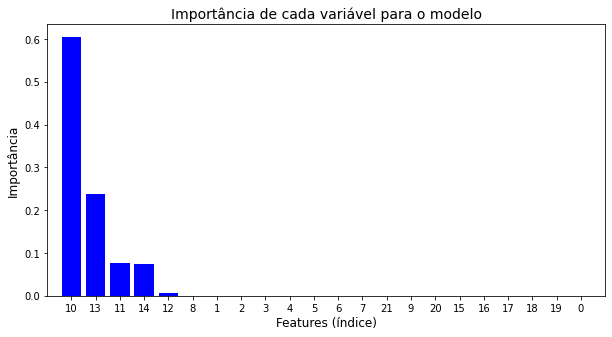

In [ ]:
importances = modelo_90_10.feature_importances_
indices = np.argsort(importances)[::-1]
print("Importância de cada variável para o modelo:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
f, ax = plt.subplots(figsize=(10, 5))
plt.title("Importância de cada variável para o modelo", fontsize = 14)
plt.bar(range(X.shape[1]), importances[indices],
    color="b", 
    align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.ylabel("Importância", fontsize = 12)
plt.xlabel("Features (índice)", fontsize = 12)

plt.savefig("importance_features_tree.png", dpi=300)

plt.show()


# 0 - 'maternal_age' 
# 1 - 'tp_maternal_schooling'
# 2 - 'tp_marital_status'
# 3 - 'tp_maternal_race'
# 4 - 'num_live_births'
# 5 - 'num_fetal_losses'
# 6 - 'num_previous_gestations'
# 7 - 'num_normal_labors'
# 8 - 'num_cesarean_labor'
# 9 - 'tp_pregnancy'
# 10 - 'newborn_weight'
# 11 - 'gestaional_week'
# 12 - 'cd_apgar1',
# 13 - 'cd_apgar5'
# 14 - 'has_congenital_malformation'
# 15 - 'tp_newborn_presentation'
# 16 - 'num_prenatal_appointments'
# 17 - 'tp_labor'
# 18 -'was_cesarean_before_labor'
# 19 -'was_labor_induced'
# 20 -'tp_childbirth_care'
# 21 -'tp_robson_group'

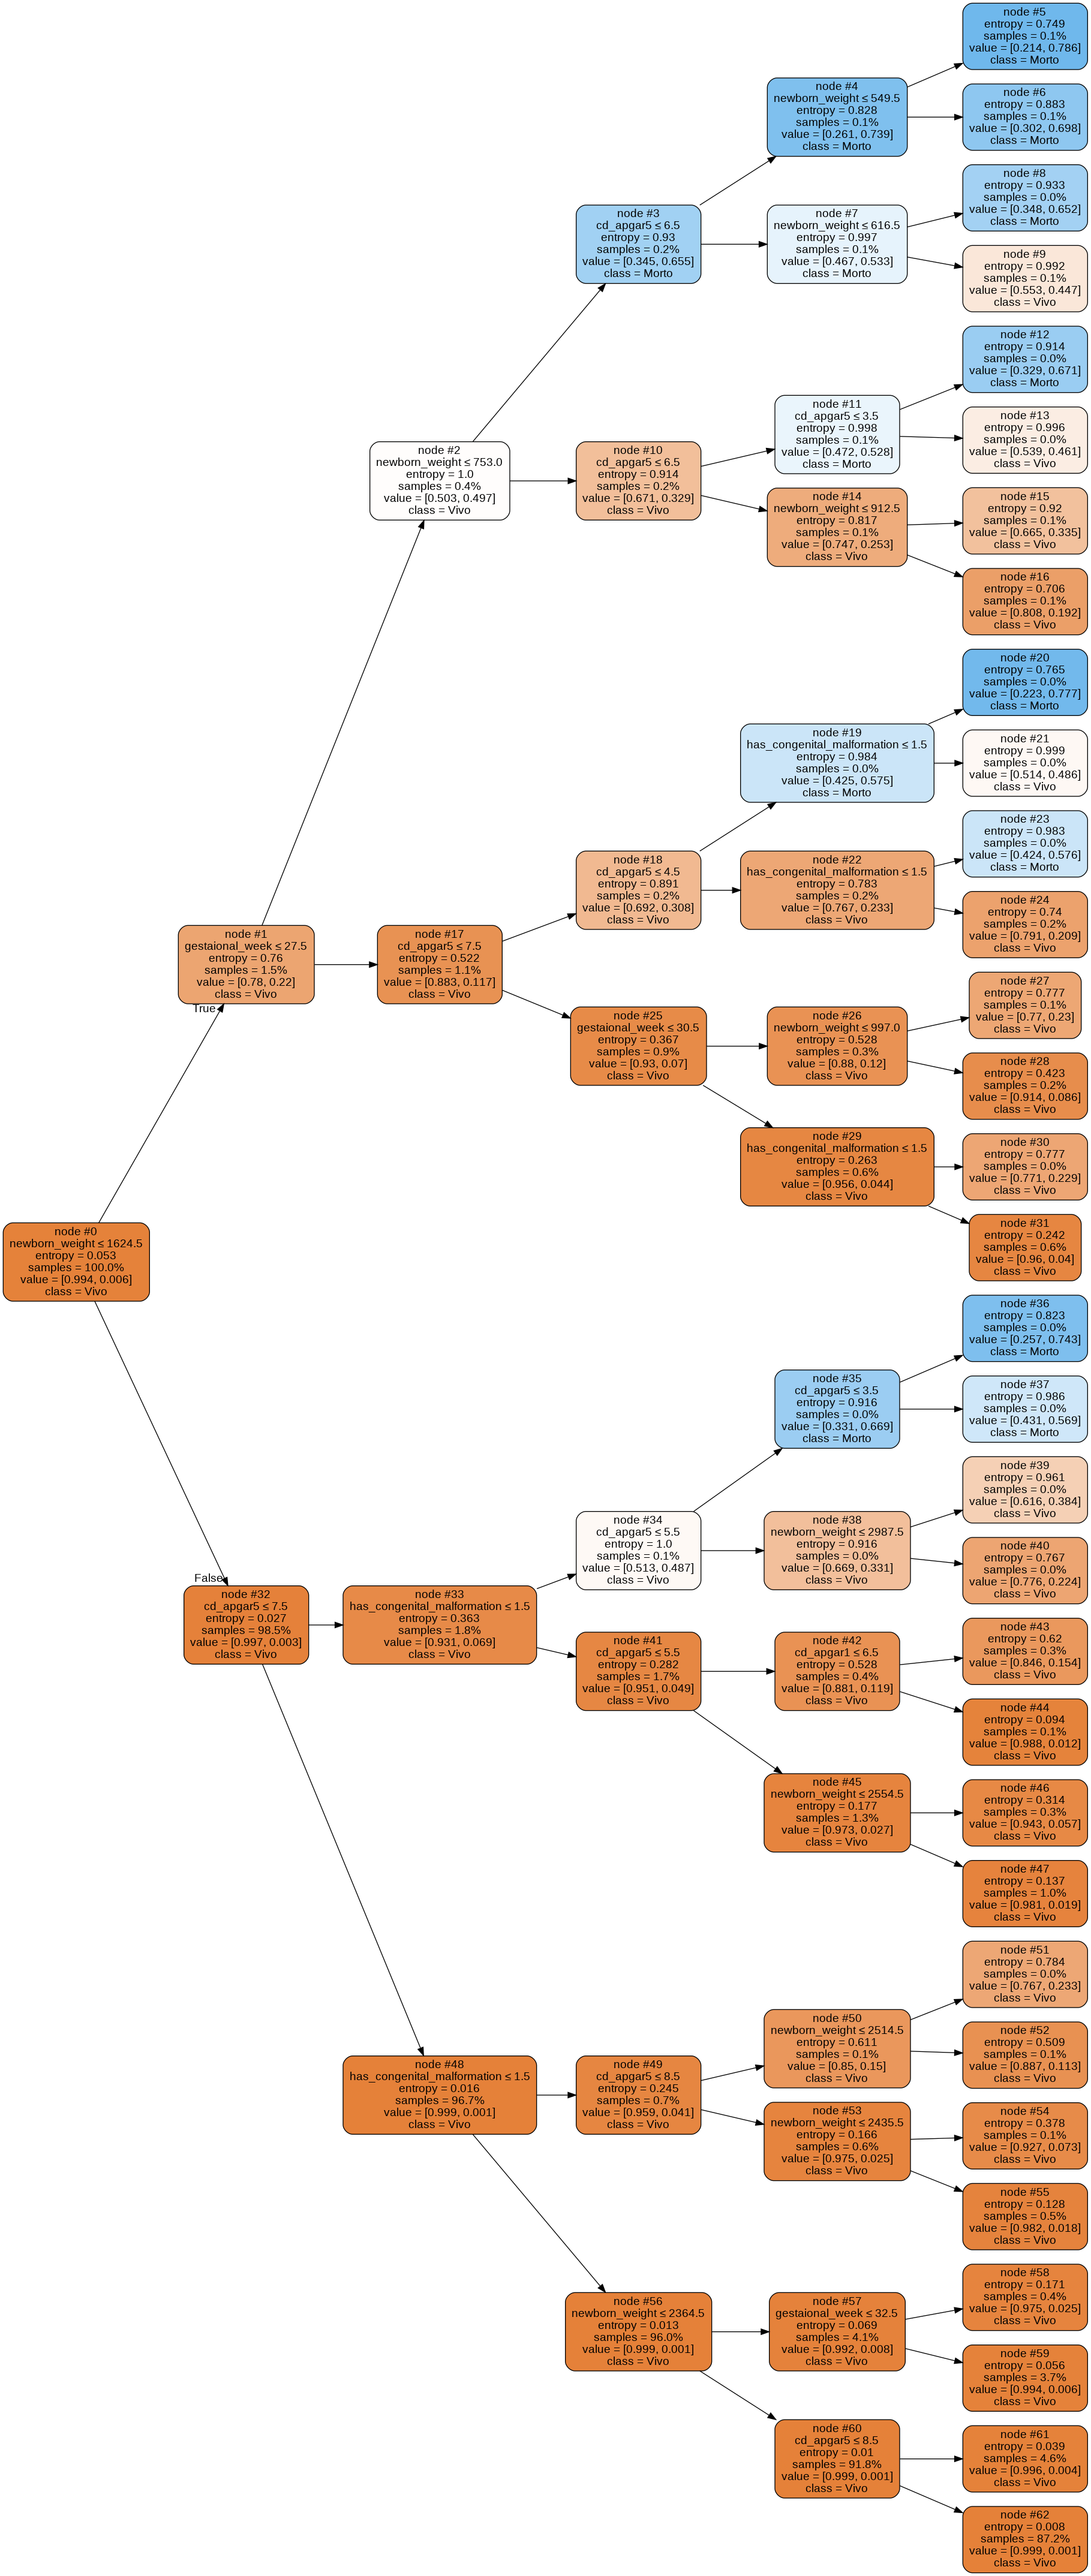

In [ ]:
# Montando imagem da árvore de decisão
dot_data = StringIO()
export_graphviz(modelo_90_10, out_file=dot_data, filled=True, feature_names=nome_features, 
                class_names=['Vivo','Morto'], rounded=True, special_characters=True, 
                node_ids=True, proportion=True,max_depth=5,rotate=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
graph.write_png("arvore.png")
Image('arvore.png',)

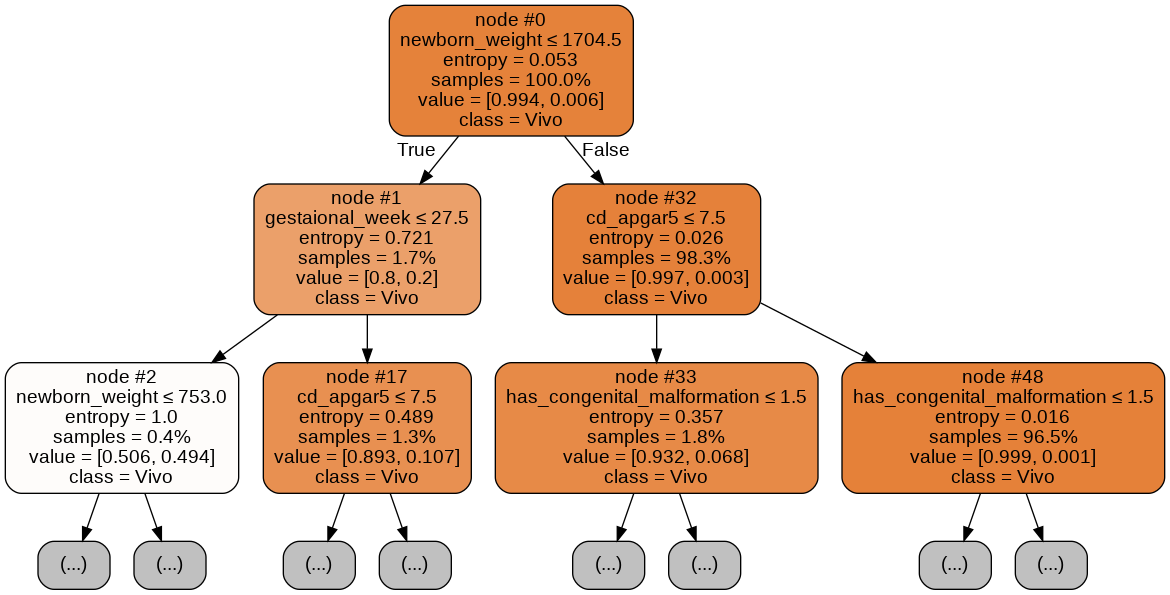

In [ ]:
# Montando imagem da árvore de decisão
dot_data = StringIO()
export_graphviz(modelo_90_10, out_file=dot_data, filled=True, feature_names=nome_features, 
                class_names=['Vivo','Morto'], rounded=True, special_characters=True, 
                node_ids=True, proportion=True,max_depth=2)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
graph.write_png("arvore_short.png")
Image('arvore_short.png',)

### Curva ROC


Treino/Teste resultados para DecisionTreeClassifier:
Accuracy = 0.995
Log_loss = 0.019
AUC = 0.929

*Nota: Usando um limite de 0.001 garante uma sensibilidade de 1.000 
e uma especificidade de 0.000, ou seja, uma taxa de falsos positivos de 100.00%.



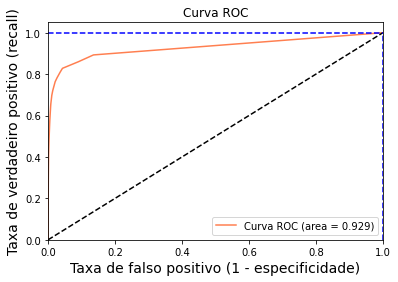

In [ ]:
y_pred = modelo_90_10.predict(xTeste)
y_pred_proba = modelo_90_10.predict_proba(xTeste)[:, 1]
[fpr, tpr, thr] = roc_curve(yTeste, y_pred_proba)

print('Treino/Teste resultados para %s:' %modelo_90_10.__class__.__name__)
print("Accuracy = %2.3f" % accuracy_score(yTeste, y_pred))
print("Log_loss = %2.3f" % log_loss(yTeste, y_pred_proba))
print("AUC = %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) 

#plt.figure(figsize=(13, 13))
plt.plot(fpr, tpr, color='coral', label='Curva ROC (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de falso positivo (1 - especificidade)', fontsize=14)
plt.ylabel('Taxa de verdadeiro positivo (recall)', fontsize=14)
plt.title('Curva ROC')
plt.legend(loc="lower right")

plt.savefig("ROC.png", dpi=300)
print("\n*Nota: Usando um limite de %.3f " % thr[idx] + 
      "garante uma sensibilidade de %.3f " % tpr[idx] +  
      "\ne uma especificidade de %.3f" % (1-fpr[idx]) + 
      ", ou seja, uma taxa de falsos positivos de %.2f%%.\n" % (np.array(fpr[idx])*100))

plt.show()


Métricas do modelo usando divisão 90/10

- PRECISÃO: DAS CLASSIFICAÇÕES QUE O MODELO FEZ PARA UMA DETERMINADA CLASSE

- RECALL: DOS POSSÍVEIS DATAPOINTS PERTECENTES A UMA DETERMINADA CLASSE

In [ ]:
Y_predicoes = modelo_90_10.predict(xTeste)

print("ACURÁCIA DA ÁRVORE: ", accuracy_score(yTeste, Y_predicoes))
print (classification_report(yTeste, Y_predicoes))

ACURÁCIA DA ÁRVORE:  0.9948404122344949
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    671807
           1       0.71      0.29      0.41      4216

    accuracy                           0.99    676023
   macro avg       0.85      0.65      0.71    676023
weighted avg       0.99      0.99      0.99    676023



 # 3. Criando modelo usando validação cruzada

In [ ]:
# k = 10 na divisão da base para treino e teste 
algortimo_arvore = DecisionTreeClassifier(criterion='entropy', max_depth=3)
scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

modelo2 = cross_validate(algortimo_arvore, X, Y, cv=10, 
                         scoring=list(scoring.values()), 
                         return_train_score=False)

print('Resultado usando K-fold = 10 no cross-validation:\n')
for sc in range(len(scoring)):
    print("%s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -modelo2['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss' 
                               else modelo2['test_%s' % list(scoring.values())[sc]].mean(), 
                               modelo2['test_%s' % list(scoring.values())[sc]].std()))

Resultado usando K-fold = 10 no cross-validation:

accuracy: 0.995 (+/-0.000)
log_loss: 0.020 (+/-0.000)
auc: 0.898 (+/-0.003)


Matriz de confusão


In [ ]:
algortimo_arvore = DecisionTreeClassifier(criterion='entropy', max_depth=3)
modelo2_predicts = cross_val_predict(algortimo_arvore, X, Y, cv=10)
cm_modelo2 = confusion_matrix(Y, modelo2_predicts)
print(cm_modelo2)

[[6714117    5074]
 [  31479    9552]]


In [ ]:
# generate report
print(classification_report(Y, modelo2_predicts))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   6719191
           1       0.65      0.23      0.34     41031

    accuracy                           0.99   6760222
   macro avg       0.82      0.62      0.67   6760222
weighted avg       0.99      0.99      0.99   6760222

